# Introduction to APIs


This tutorial introduces Application Programming Interfaces (APIs) using the Yelp API as an example. 



## Key Terminology

- ***API***: An Application Programming Interface is the mechanism by which computers can talk to other computers and share information.
- ***REST API***: This is a type of API that uses standard web protocols to communicate.  
- ***Endpoint***: This is a URL, just like you see in a web browser, for requesting specific kinds of data from the API.
- ***Request***: A request is how you initiate a conversation with an API in order to "request" information. Requests are made to specific endpoints.
- ***Parameters***: When you issue a request to an *endpoint*, that is make a web request, you usually include some parameters, like search terms, to refine your query.
- ***Response***: When you make an API request
- ***JSON***: JavaScript Object Notation is the data format many APIs use to communicate over tehe web.
- ***Credentials/Authentication/Keys***: Many APIs require some form of authentication in order to get information. Because APIs are computers talking to computers it is not a good practice to use usernames and passwords (those are for humans!). Instead, APIs often use a system called [OAuth](https://en.wikipedia.org/wiki/OAuth) in which the API service gives you an access token or a key instead of a password. *Don't share your access tokens!* 

## Start with Documentation


* Because every API is different, it is important to become familiar with the various endpoints and parameters by *reading the documentation*. 
* Lets take a look at the [Yelp API](https://www.yelp.com/developers)
* Before we dive into the Python code, we should play with the [Yelp API Console](https://www.yelp.com/developers/api_console). 


## Accessing APIs with Python

* We can use Python to *progammatically* request data from the API. 
* This is much easier than using a web browser
* To do this we are going to use a 3rd party library, [Requests](http://docs.python-requests.org/en/latest/), to handle the HTTP requests.


In [39]:
import requests

## Getting authenticated

* To access the Yelp API we need to be authenticated. How do I know that? [I read the documentation!](https://www.yelp.com/developers/documentation/v3/get_started)
* APIs are the door to the information system and we need the keys to unlock the door.
* We create an "app" and that app has a set of keys for opening the door.

In [40]:
AUTHENTICATION_URL = "https://api.yelp.com/oauth2/token"
GRANT_TYPE="client_credentials"
APP_ID="4EDvg4OOFwJB-NT-tovQZQ"
APP_SECRET="r9YgAPf97vkyNvMWiEQySBG2ZoAL3TX8s28Po5kpk99y0I8NuoBGBB25nTMnVkrW"

## Getting an access token

* I know it is complicated, but once we have the keys then we must request a temporary access token.
* This is all part of a machine-to-machine protocol for authorizing access to information system called [Oauth](https://oauth.net/2/)

In [41]:
authentication_response = requests.post(AUTHENTICATION_URL, 
                         data={"grant_type": GRANT_TYPE,
                               "client_id": APP_ID,
                               "client_secret":APP_SECRET},
                        headers={"content-type":"application/x-www-form-urlencoded"})
authentication_response.json()

{'access_token': '4syVgjjcxtyrf0vJAO4IanHdtpNquXN1MZuokIkNQsPsPZ_70Y4mSBk10bX7y5HrbcNJfE4daP1TNVY5d-h2w-MpF88OPNDZEUATIRDMwxjddnj78LCSzeTxNUblWHYx',
 'expires_in': 15485966,
 'token_type': 'Bearer'}

In [42]:
authentication_token = authentication_response.json()['access_token']
authentication_token

'4syVgjjcxtyrf0vJAO4IanHdtpNquXN1MZuokIkNQsPsPZ_70Y4mSBk10bX7y5HrbcNJfE4daP1TNVY5d-h2w-MpF88OPNDZEUATIRDMwxjddnj78LCSzeTxNUblWHYx'

* [Following the documentation](https://www.yelp.com/developers/documentation/v3/get_started), this means it is working! We now have the `access_token` needed to make requests to the [business search api](https://www.yelp.com/developers/documentation/v3/business_search)
* Now we need to read the documentation of the [business search api](https://www.yelp.com/developers/documentation/v3/business_search) to learn how to craft an HTTP request to the search *endpoint*.
    * Usually this means "What is the request URL?" and "What are the parameters?"

In [43]:
# request endpoint
SEARCH_URL = "https://api.yelp.com/v3/businesses/search"

# parameters
SEARCH_LOCATION = "Pittsburgh"
SEARCH_LIMIT = 50
SEARCH_TERM = ""

* Now we can look at the documentation for the Requests python library about how to [make a request](http://docs.python-requests.org/en/master/user/quickstart/#make-a-request)
* I also looked at some [example python code](https://github.com/Yelp/yelp-fusion/blob/master/fusion/python/sample.py#L94) provided by Yelp to figured out the authorization headers

In [44]:
# make an HTTP GET request to the 
search_response = requests.get(SEARCH_URL,
                               headers={"Authorization":"Bearer {}".format(authentication_token)},
                               params={"term":SEARCH_TERM,
                                       "location":SEARCH_LOCATION,
                                       "limit":SEARCH_LIMIT})
# print the parsed response
search_response.json()

{'businesses': [{'categories': [{'alias': 'gardens',
     'title': 'Botanical Gardens'},
    {'alias': 'parks', 'title': 'Parks'}],
   'coordinates': {'latitude': 40.439248, 'longitude': -79.947347},
   'display_phone': '(412) 622-6914',
   'distance': 2753.5113774459996,
   'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gVY6b6FGf29TPpyRfec_eA/o.jpg',
   'is_closed': False,
   'location': {'address1': '1 Schenley Park',
    'address2': None,
    'address3': '',
    'city': 'Pittsburgh',
    'country': 'US',
    'display_address': ['1 Schenley Park', 'Pittsburgh, PA 15213'],
    'state': 'PA',
    'zip_code': '15213'},
   'name': 'Phipps Conservatory and Botanical Gardens',
   'phone': '+14126226914',
   'rating': 4.5,
   'review_count': 208,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/phipps-conservatory-and-botanical-gardens-pittsburgh?adjust_creative=4EDvg4OOFwJB-NT-tovQZQ&utm_campaign=yelp_api_v3&

In [45]:
# see how much data do we have? 
len(search_response.json()['businesses'])

50

## Automating Data Collection

* According to the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) we can get information about up to 1000 businesses and we can only request information about 50 businesses at a time.
* This means we need to make a loop that makes a series of requests to get all the information
* Each iteration of the loop will use the `offset` parameter to request different information


In [46]:
# A short script to download all available information about 
# 1000 businesses in the Pittsburhg area


# request endpoint
SEARCH_URL = "https://api.yelp.com/v3/businesses/search"

# parameters
SEARCH_LOCATION = "Pittsburgh"
SEARCH_LIMIT = 50
SEARCH_TERM = ""


# create a container list to hold our results
yelp_business_data = []


# loop
for offset in range(0,1000,50):
    # Print the where we are in the loop
    print("Requesting offset {}".format(offset))
    
    # make the HTTP request to the Yelp business search endpoint
    search_response = requests.get(SEARCH_URL,
                               headers={"Authorization":"Bearer {}".format(authentication_token)},
                               params={"term": SEARCH_TERM,
                                       "location": SEARCH_LOCATION,
                                       "limit": SEARCH_LIMIT,
                                       "offset": offset})
    # put the results in the container list
    yelp_business_data.extend(search_response.json()['businesses'])

# print total when loop is completed
print("Collected information about {} businesses".format(len(yelp_business_data)))

Requesting offset 0
Requesting offset 50
Requesting offset 100
Requesting offset 150
Requesting offset 200
Requesting offset 250
Requesting offset 300
Requesting offset 350
Requesting offset 400
Requesting offset 450
Requesting offset 500
Requesting offset 550
Requesting offset 600
Requesting offset 650
Requesting offset 700
Requesting offset 750
Requesting offset 800
Requesting offset 850
Requesting offset 900
Requesting offset 950
Collected information about 1000 businesses


In [47]:
yelp_business_data[0]

{'categories': [{'alias': 'gardens', 'title': 'Botanical Gardens'},
  {'alias': 'parks', 'title': 'Parks'}],
 'coordinates': {'latitude': 40.439248, 'longitude': -79.947347},
 'display_phone': '(412) 622-6914',
 'distance': 2753.5113774459996,
 'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/gVY6b6FGf29TPpyRfec_eA/o.jpg',
 'is_closed': False,
 'location': {'address1': '1 Schenley Park',
  'address2': None,
  'address3': '',
  'city': 'Pittsburgh',
  'country': 'US',
  'display_address': ['1 Schenley Park', 'Pittsburgh, PA 15213'],
  'state': 'PA',
  'zip_code': '15213'},
 'name': 'Phipps Conservatory and Botanical Gardens',
 'phone': '+14126226914',
 'rating': 4.5,
 'review_count': 208,
 'transactions': [],
 'url': 'https://www.yelp.com/biz/phipps-conservatory-and-botanical-gardens-pittsburgh?adjust_creative=4EDvg4OOFwJB-NT-tovQZQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4EDvg4OOFwJB-NT-to

## Inspecting the Data

* Now we have data for 1000 businesses in the Pittsburgh area. Why don't we try and learn something!
* First step is to make these data more tabular so we can load it into a Pandas Dataframe

In [48]:
from numpy import nan
%matplotlib inline

# a short function to extract the data we want from a single business entry
def extract_info(business):
    """Extracts a few of the datapoints from the business data"""
    return {
        "id":business['id'],
        "name":business['name'],
        "rating":business['rating'],
        "review_count":business['review_count'],
        "price": business['price'] if 'price' in business else nan
        
    }

# use a list comprehension to process the data
extracted_data = [extract_info(biz) for biz in yelp_business_data]

# look at the first five entries 
extracted_data[0:3]

[{'id': 'phipps-conservatory-and-botanical-gardens-pittsburgh',
  'name': 'Phipps Conservatory and Botanical Gardens',
  'price': nan,
  'rating': 4.5,
  'review_count': 208},
 {'id': 'la-gourmandine-bakery-and-pastry-shop-pittsburgh',
  'name': 'La Gourmandine Bakery & Pastry Shop',
  'price': '$',
  'rating': 4.5,
  'review_count': 319},
 {'id': 'amazing-cafe-pittsburgh',
  'name': 'Amazing Cafe',
  'price': '$$',
  'rating': 4.5,
  'review_count': 92}]

In [49]:
# load pandas so we can use Dataframes
import pandas as pd

# load the extracted data into a Pandas Dataframe
yelp_dataframe = pd.DataFrame(extracted_data)

# look at the first 5 entries
yelp_dataframe.head()

,id,name,price,rating,review_count
0,phipps-conservatory-and-botanical-gardens-pitt...,Phipps Conservatory and Botanical Gardens,NaN,4.5,208
1,la-gourmandine-bakery-and-pastry-shop-pittsburgh,La Gourmandine Bakery & Pastry Shop,$,4.5,319
2,amazing-cafe-pittsburgh,Amazing Cafe,$$,4.5,92
3,randyland-pittsburgh,Randyland,$,5.0,34
4,espresso-a-mano-pittsburgh,Espresso A Mano,$,4.5,265


In [50]:
# inspect the datatypes
yelp_dataframe.dtypes

id               object
name             object
price            object
rating          float64
review_count      int64
dtype: object

In [51]:
# Get some quick summary statistics about the numeric data
yelp_dataframe.describe()

,rating,review_count
count,1000.000000,1000.000000
mean,4.006000,89.016000
std,0.521763,109.548211
min,2.500000,3.000000
25%,3.500000,26.000000
50%,4.000000,54.000000
75%,4.500000,106.250000
max,5.000000,1279.000000


In [52]:
# look at the lowest rated businesses in Pittsburgh
yelp_dataframe.sort_values("rating").head(10)

,id,name,price,rating,review_count
950,steel-cactus-pittsburgh-2,Steel Cactus,$$,2.5,205
805,lulus-noodles-pittsburgh,Lulu's Noodles,$,2.5,339
941,rolands-seafood-grill-pittsburgh,Roland's Seafood Grill,$$,2.5,251
699,nakama-pittsburgh,Nakama,$$,3.0,251
694,mccormick-and-schmicks-seafood-and-steaks-pitt...,McCormick & Schmick's Seafood & Steaks,$$,3.0,108
803,sushi-too-pittsburgh,Sushi Too,$$,3.0,93
931,sakura-teppanyaki-and-sushi-pittsburgh,Sakura Teppanyaki & Sushi,$$,3.0,91
825,cains-saloon-pittsburgh,Cain's Saloon,$$,3.0,128
698,orient-express-pittsburgh,Orient Express,$,3.0,81
504,six-penn-kitchen-pittsburgh,Six Penn Kitchen,$$,3.0,258


In [53]:
# look at the 10 highest rated business in Pittsburgh
yelp_dataframe.sort_values("rating", ascending=False).head(10)

,id,name,price,rating,review_count
708,walters-automotive-pittsburgh,Walter's Automotive,NaN,5.0,106
170,north-shore-deli-pittsburgh,North Shore Deli,$,5.0,17
757,christopher-p-hayner-dmd-pittsburgh,"Christopher P Hayner, DMD",NaN,5.0,22
762,bicycle-heaven-pittsburgh,Bicycle Heaven,$,5.0,68
768,colangelos-bakery-pittsburgh,Colangelo's Bakery,$$,5.0,39
90,groceria-merante-pittsburgh,Groceria Merante,$,5.0,25
163,west-end-elliott-overlook-pittsburgh,West End - Elliott Overlook,NaN,5.0,18
166,schenley-park-pittsburgh-2,Schenley Park,NaN,5.0,14
779,the-culturals-elite-pittsburgh,The Cultural's Elite,$$,5.0,25
798,pregame-pittsburgh,Pregame,$,5.0,5


In [54]:
# look at the most reviewed businesses in Pittsburgh
yelp_dataframe.sort_values("review_count", ascending=False).head(10)

,id,name,price,rating,review_count
197,meat-and-potatoes-pittsburgh,Meat & Potatoes,$$$,4.0,1279
292,primanti-bros-pittsburgh-15,Primanti Bros.,$,3.5,998
28,gaucho-parrilla-argentina-pittsburgh,Gaucho Parrilla Argentina,$$,4.5,977
238,church-brew-works-pittsburgh,Church Brew Works,$$,3.5,812
47,noodlehead-pittsburgh,Noodlehead,$,4.5,651
71,fat-heads-saloon-pittsburgh,Fat Heads Saloon,$$,4.0,600
11,täkō-pittsburgh,täkō,$$,4.5,577
20,butcher-and-the-rye-pittsburgh,Butcher and the Rye,$$$,4.5,570
118,sienna-mercato-pittsburgh,Sienna Mercato,$$,4.0,548
401,primanti-bros-pittsburgh,Primanti Bros,$,3.5,525


In [55]:
# look at the most expensive resturants in Pittsburgh
yelp_dataframe.sort_values("price", ascending=False).head(10)

,id,name,price,rating,review_count
628,tmd-pittsburgh,TMD,$$$$,4.5,6
380,mortons-the-steakhouse-pittsburgh,Morton's The Steakhouse,$$$$,3.5,76
33,alla-famiglia-pittsburgh,Alla Famiglia,$$$$,4.5,135
84,the-capital-grille-pittsburgh,The Capital Grille,$$$$,4.0,201
220,umi-pittsburgh,Umi,$$$$,4.0,118
263,ruths-chris-steak-house-pittsburgh,Ruths Chris Steak House,$$$$,4.0,89
168,avenue-b-pittsburgh,Avenue B,$$$,4.0,202
183,the-melting-pot-pittsburgh,The Melting Pot,$$$,4.0,115
41,the-twisted-frenchman-pittsburgh,The Twisted Frenchman,$$$,4.5,92
553,social-house-seven-pittsburgh,Social House Seven,$$$,3.5,90


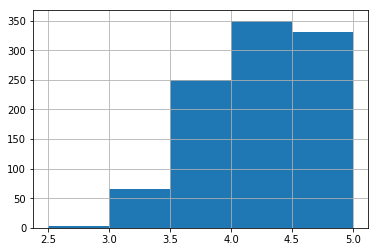

In [56]:
# how are the ratings distributed
yelp_dataframe['rating'].hist(bins=5)

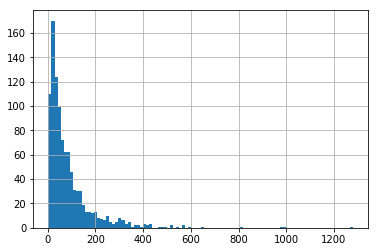

In [57]:
# how are the review counts distributed
yelp_dataframe['review_count'].hist(bins=100)

# More resources on APIs and Python

* [Python API tutorial - An Introduction to using APIs](https://www.dataquest.io/blog/python-api-tutorial/) - Good step-by-step tutorial covering what we talked about here but in more depth.
* [Mining the Social Web, 2nd Ediction](http://shop.oreilly.com/product/0636920030195.do) - Great book about getting data from various social media sites and doing basic analysis.
* [Chapter 12 - Networked programs](https://books.trinket.io/pfe/12-network.html) and [Chapter 13 - Using Web Services](https://books.trinket.io/pfe/13-web.html) from the free book [Python for Everybody](https://www.py4e.com/book.php). 